In [1]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
#data = tf.keras.utils.image_dataset_from_directory('images')

In [3]:
# Path to your dataset directory
dataset_dir = 'images'

# Define your batch size and image size
batch_size = 32
image_size = (256, 256)

# Function to extract class name from directory name
image_dataset = image_dataset_from_directory(
    dataset_dir,
    labels='inferred',
    label_mode='int',  # We will map class names to integers manually
    batch_size=batch_size,
    image_size=image_size,
    shuffle=False,
)

# Extract class names from dataset directory names
class_names = sorted(image_dataset.class_names, key=lambda name: int(name.split(',')[0].strip()))

Found 52800 files belonging to 17600 classes.


In [4]:
values_before_comma = [item.split(',')[0] for item in class_names]

In [5]:
values_before_comma.sort()

In [6]:
expanded_list = [val for val in values_before_comma for _ in range(3)]
labels_numeric = [int(label) for label in expanded_list]

In [7]:
labels_numeric[0]

0

In [8]:
image_dataset = image_dataset_from_directory(
    dataset_dir,
    labels=labels_numeric,
    
    label_mode='int',  
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
)

Found 52800 files belonging to 88 classes.


In [9]:
image_iterator = image_dataset.as_numpy_iterator()

In [10]:
batch = image_iterator.next()

In [11]:
batch[1][0]

16

## Prepocess Data

In [12]:
data = image_dataset.map(lambda x,y:(x/255,y)) #Scale data from 0 to 1

In [13]:
len(data) #checking to see how many batches I have in my dataset 

1650

In [14]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [15]:
train_size + val_size + test_size

1650

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building deep learning model

In [17]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
#Adding two layers, Convultion with 16 filters (3x3 size), stride of 1.Relu activation Its my first layer so I need my input shape
#MaxPooling layer, takes max value from Convultion layer from a region in a 2x2 region to reduce image data
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())


model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

#Flatten the data for our dense layer 
model.add(Flatten())

#Fully conected layers 
model.add(Dense(256,activation='relu'))
# 1 final output layer for my 88 classes
model.add(Dense(88,activation='softmax'))

In [55]:
model.compile('adam',loss= tf.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 16)       

## Training the Model

In [57]:
logdir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #Allows us to save model at a certain checkpoint

In [59]:
hist = model.fit(train,epochs = 15, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/15
1155/1155 [==============================] - 1260s 1s/step - loss: 4.3862 - accuracy: 0.0241 - val_loss: 4.2387 - val_accuracy: 0.0381
Epoch 2/15
1155/1155 [==============================] - 1132s 979ms/step - loss: 4.0847 - accuracy: 0.0587 - val_loss: 4.1122 - val_accuracy: 0.0532
Epoch 3/15
1155/1155 [==============================] - 1133s 981ms/step - loss: 3.6991 - accuracy: 0.1252 - val_loss: 4.1850 - val_accuracy: 0.0580
Epoch 4/15
1155/1155 [==============================] - 1070s 926ms/step - loss: 2.8753 - accuracy: 0.2873 - val_loss: 4.8530 - val_accuracy: 0.0503
Epoch 5/15
1155/1155 [==============================] - 1135s 982ms/step - loss: 1.8260 - accuracy: 0.5324 - val_loss: 5.8980 - val_accuracy: 0.0507
Epoch 6/15
1155/1155 [==============================] - 1110s 961ms/step - loss: 1.0282 - accuracy: 0.7280 - val_loss: 7.7419 - val_accuracy: 0.0535
Epoch 7/15
1155/1155 [==============================] - 1071s 927ms/step - loss: 0.6001 - accuracy: 0.8377 - 

In [61]:
import matplotlib.pyplot as plt 

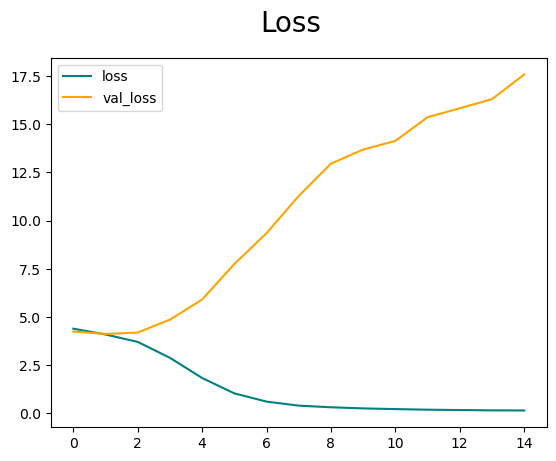

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

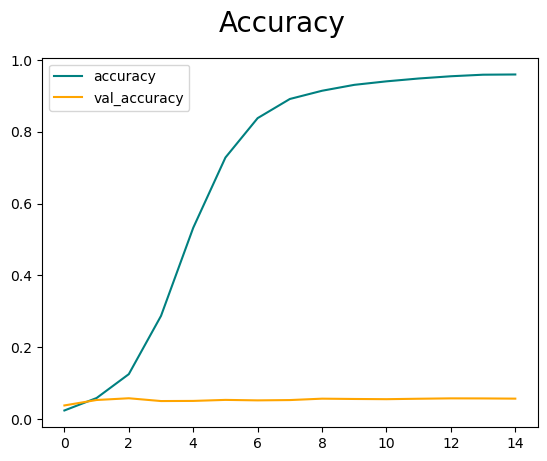

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()